📌 Data Analysis and Data Science Task - 1

Student Performance Dataset

Step 1: Importing Required Libraries

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")

Step 2: Load the Dataset

In [57]:
# Load CSV file
df = pd.read_csv("student-mat.csv", sep=';')
# Clean coLumn names (remove " quotes)
df. columns = df.columns.str.replace("", '').str.strip()
# Check first 10 rows
df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


Step 3: Data Exploration

In [58]:
# Check for missing values
print("Missing values in each column:\n", df.isnull().sum())

# Check data types
print("\nData types of each column:\n", df.dtypes)

# Check the shape of the dataset
print(f"\nDataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

Missing values in each column:
 school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

Data types of each column:
 school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object

Step 4: Data Cleaning

In [59]:
# Remove duplicate rows
initial_shape = df.shape
df = df.drop_duplicates()
final_shape = df.shape

print(f"\n Duplicate rows removed: {initial_shape[0] - final_shape[0]}")
print(f"New dataset shape: {final_shape}")


 Duplicate rows removed: 0
New dataset shape: (395, 33)


Step 5: Analysis

In [60]:
# Step 5a: Analysis Question 1 - Average score in math (G3)
average_g3 = df["G3"].mean()
print(f" Average final grade (G3): {average_g3:.2f}")

 Average final grade (G3): 10.42


In [61]:
# Step 5b: Analysis Question 2 - Students scoring above 15 in G3
count_above_15 = df[df["G3"] > 15].shape[0]
print(f" Number of students with G3 > 15: {count_above_15}")

 Number of students with G3 > 15: 40


In [62]:
# Step 5c: Analysis Question 3 - Correlation between study time and G3
correlation = df["studytime"].corr(df["G3"])
print(f" Correlation between study time and G3: {correlation:.2f}")

 Correlation between study time and G3: 0.10


In [63]:
# Step 5d: Analysis Question 4 - Gender comparison on average G3
avg_by_gender = df.groupby("sex")["G3"].mean()
print("\n Average G3 by gender:\n", avg_by_gender)
# Identify the gender with the higher average
higher_gender = avg_g3_by_gender.idxmax()
print(f"\n Gender with higher average G3: {higher_gender}")


 Average G3 by gender:
 sex
F     9.966346
M    10.914439
Name: G3, dtype: float64

 Gender with higher average G3: M


Step 6: Visualizations

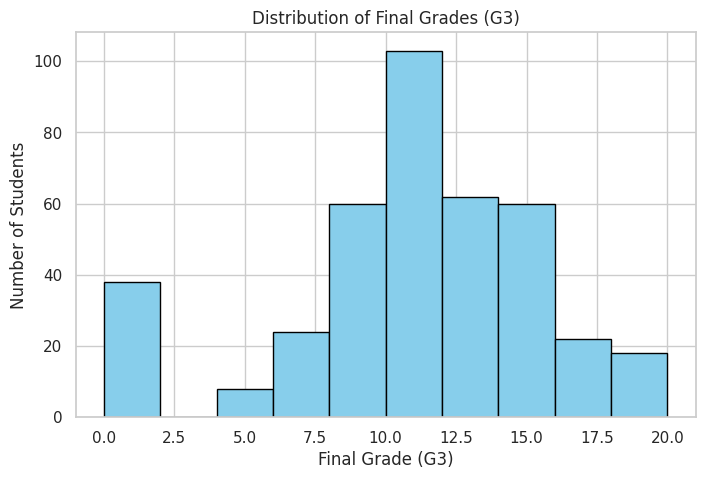

In [64]:
# Step 6a: Visualization - Histogram of G3
plt.figure(figsize=(8, 5))
plt.hist(df["G3"], bins=10, color="skyblue", edgecolor="black")
plt.title("Distribution of Final Grades (G3)")
plt.xlabel("Final Grade (G3)")
plt.ylabel("Number of Students")
plt.show()

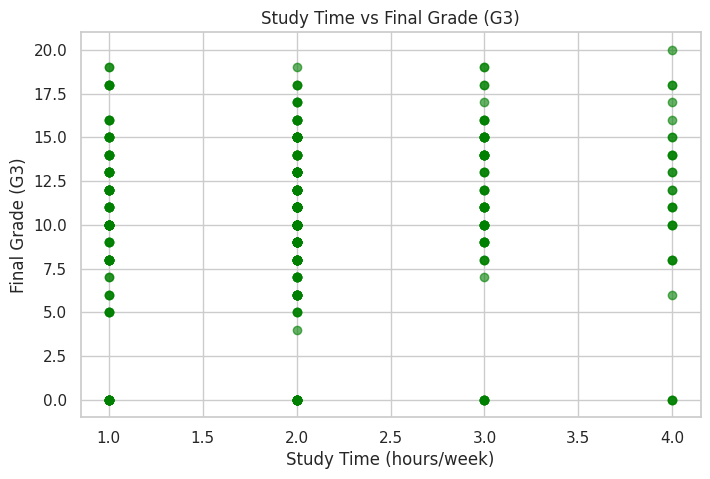

In [65]:
# Step 6b: Scatter Plot - Study Time vs G3
plt.figure(figsize=(8, 5))
plt.scatter(df["studytime"], df["G3"], color="green", alpha=0.6)
plt.title("Study Time vs Final Grade (G3)")
plt.xlabel("Study Time (hours/week)")
plt.ylabel("Final Grade (G3)")
plt.grid(True)
plt.show()

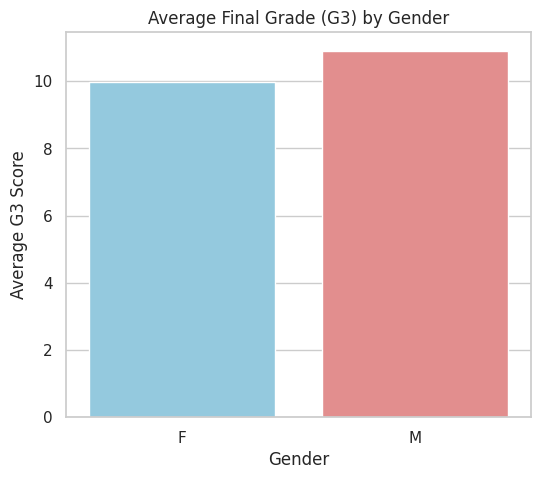

In [66]:
# Calculate average G3 by gender
avg_by_gender = df.groupby("sex")["G3"].mean().reset_index()

# Bar plot with distinct colors for each gender
plt.figure(figsize=(6, 5))
sns.barplot(x="sex", y="G3", hue="sex", data=avg_by_gender, palette=["skyblue", "lightcoral"], legend=False)

# Labels and title
plt.title("Average Final Grade (G3) by Gender")
plt.xlabel("Gender")
plt.ylabel("Average G3 Score")
plt.show()